<h2 style="color:red;text-decoration:underline">Problem Statement :</h2>
<p><strong>Human activity recognition is the problem of classifying sequences of accelerometer data recorded by specialized harnesses or smart phones into known well-defined movements.

It is a challenging problem given the large number of observations produced each second, the temporal nature of the observations, and the lack of a clear way to relate accelerometer data to known movements.</strong><p>

<h2 style="color:violet;text-decoration:underline">Data Collection:</h2>
<p><strong>The experiments have been carried out with a group of 30 volunteers within an age bracket of 19-48 years. 
Each person performed six activities (WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING) wearing a smartphone 
(Samsung Galaxy S II) on the waist. Using its embedded accelerometer and gyroscope, we captured 3-axial linear acceleration and 
3-axial angular velocity at a constant rate of 50Hz. The experiments have been video-recorded to label the data manually. 
The obtained dataset has been randomly partitioned into two sets, where 70% of the volunteers was selected for generating the training data 
and 30% the test data. 


The sensor signals (accelerometer and gyroscope) were pre-processed by applying noise filters and then sampled in 
fixed-width sliding windows of 2.56 sec and 50% overlap (128 readings/window). The sensor acceleration signal, 
which has gravitational and body motion components, was separated using a Butterworth low-pass filter into body acceleration and gravity. 
The gravitational force is assumed to have only low frequency components, therefore a filter with 0.3 Hz cutoff frequency was used. 
From each window, a vector of features was obtained by calculating variables from the time and frequency domain.<strong></p>

In [1]:
#import required libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#reading the data:
train=pd.read_csv("train.csv") #reading the train data
test=pd.read_csv("test.csv") #reading the test data
print(train.shape) #displaying the train shape
print(test.shape) #displaying the test shape
print(type(train),type(test))

(7352, 563)
(2947, 563)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


In [3]:
#displaying the features:
#not gonna display the head as the the values are too large
pd.options.display.max_seq_items=600 #to display all the items in the list
train.columns #to display columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X', 'tBodyAcc-max()-Y', 'tBodyAcc-max()-Z',
       'tBodyAcc-min()-X', 'tBodyAcc-min()-Y', 'tBodyAcc-min()-Z',
       'tBodyAcc-sma()', 'tBodyAcc-energy()-X', 'tBodyAcc-energy()-Y',
       'tBodyAcc-energy()-Z', 'tBodyAcc-iqr()-X', 'tBodyAcc-iqr()-Y',
       'tBodyAcc-iqr()-Z', 'tBodyAcc-entropy()-X', 'tBodyAcc-entropy()-Y',
       'tBodyAcc-entropy()-Z', 'tBodyAcc-arCoeff()-X,1',
       'tBodyAcc-arCoeff()-X,2', 'tBodyAcc-arCoeff()-X,3',
       'tBodyAcc-arCoeff()-X,4', 'tBodyAcc-arCoeff()-Y,1',
       'tBodyAcc-arCoeff()-Y,2', 'tBodyAcc-arCoeff()-Y,3',
       'tBodyAcc-arCoeff()-Y,4', 'tBodyAcc-arCoeff()-Z,1',
       'tBodyAcc-arCoeff()-Z,2', 'tBodyAcc-arCoeff()-Z,3',
       'tBodyAcc-arCoeff()-Z,4', 'tBodyAcc-correlation()-X,Y',
       'tBodyAcc-correlation()-

In [4]:
#checking for NULL values:
pd.options.display.max_rows=600 #setting the value for number of columns to be displayed
train.isnull().sum()
#there are no NULL values in the data

tBodyAcc-mean()-X                       0
tBodyAcc-mean()-Y                       0
tBodyAcc-mean()-Z                       0
tBodyAcc-std()-X                        0
tBodyAcc-std()-Y                        0
tBodyAcc-std()-Z                        0
tBodyAcc-mad()-X                        0
tBodyAcc-mad()-Y                        0
tBodyAcc-mad()-Z                        0
tBodyAcc-max()-X                        0
tBodyAcc-max()-Y                        0
tBodyAcc-max()-Z                        0
tBodyAcc-min()-X                        0
tBodyAcc-min()-Y                        0
tBodyAcc-min()-Z                        0
tBodyAcc-sma()                          0
tBodyAcc-energy()-X                     0
tBodyAcc-energy()-Y                     0
tBodyAcc-energy()-Z                     0
tBodyAcc-iqr()-X                        0
tBodyAcc-iqr()-Y                        0
tBodyAcc-iqr()-Z                        0
tBodyAcc-entropy()-X                    0
tBodyAcc-entropy()-Y              

In [5]:
#decribing the train set
pd.options.display.max_columns=600 #setting the value for number of columns to be displayed
train.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",tGravityAcc-mean()-X,tGravityAcc-mean()-Y,tGravityAcc-mean()-Z,tGravityAcc-std()-X,tGravityAcc-std()-Y,tGravityAcc-std()-Z,tGravityAcc-mad()-X,tGravityAcc-mad()-Y,tGravityAcc-mad()-Z,tGravityAcc-max()-X,tGravityAcc-max()-Y,tGravityAcc-max()-Z,tGravityAcc-min()-X,tGravityAcc-min()-Y,tGravityAcc-min()-Z,tGravityAcc-sma(),tGravityAcc-energy()-X,tGravityAcc-energy()-Y,tGravityAcc-energy()-Z,tGravityAcc-iqr()-X,tGravityAcc-iqr()-Y,tGravityAcc-iqr()-Z,tGravityAcc-entropy()-X,tGravityAcc-entropy()-Y,tGravityAcc-entropy()-Z,"tGravityAcc-arCoeff()-X,1","tGravityAcc-arCoeff()-X,2","tGravityAcc-arCoeff()-X,3","tGravityAcc-arCoeff()-X,4","tGravityAcc-arCoeff()-Y,1","tGravityAcc-arCoeff()-Y,2","tGravityAcc-arCoeff()-Y,3","tGravityAcc-arCoeff()-Y,4","tGravityAcc-arCoeff()-Z,1","tGravityAcc-arCoeff()-Z,2","tGravityAcc-arCoeff()-Z,3","tGravityAcc-arCoeff()-Z,4","tGravityAcc-correlation()-X,Y","tGravityAcc-correlation()-X,Z","tGravityAcc-correlation()-Y,Z",tBodyAccJerk-mean()-X,tBodyAccJerk-mean()-Y,tBodyAccJerk-mean()-Z,tBodyAccJerk-std()-X,tBodyAccJerk-std()-Y,tBodyAccJerk-std()-Z,tBodyAccJerk-mad()-X,tBodyAccJerk-mad()-Y,tBodyAccJerk-mad()-Z,tBodyAccJerk-max()-X,tBodyAccJerk-max()-Y,tBodyAccJerk-max()-Z,tBodyAccJerk-min()-X,tBodyAccJerk-min()-Y,tBodyAccJerk-min()-Z,tBodyAccJerk-sma(),tBodyAccJerk-energy()-X,tBodyAccJerk-energy()-Y,tBodyAccJerk-energy()-Z,tBodyAccJerk-iqr()-X,tBodyAccJerk-iqr()-Y,tBodyAccJerk-iqr()-Z,tBodyAccJerk-entropy()-X,tBodyAccJerk-entropy()-Y,tBodyAccJerk-entropy()-Z,"tBodyAccJerk-arCoeff()-X,1","tBodyAccJerk-arCoeff()-X,2","tBodyAccJerk-arCoeff()-X,3","tBodyAccJerk-arCoeff()-X,4","tBodyAccJerk-arCoeff()-Y,1","tBodyAccJerk-arCoeff()-Y,2","tBodyAccJerk-arCoeff()-Y,3","tBodyAccJerk-arCoeff()-Y,4","tBodyAccJerk-arCoeff()-Z,1","tBodyAccJerk-arCoeff()-Z,2","tBodyAccJerk-arCoeff()-Z,3","tBodyAccJerk-arCoeff()-Z,4","tBodyAccJerk-correlation()-X,Y","tBodyAccJerk-correlation()-X,Z","tBodyAccJerk-correlation()-Y,Z",tBodyGyro-mean()-X,tBodyGyro-mean()-Y,tBodyGyro-mean()-Z,tBodyGyro-std()-X,tBodyGyro-std()-Y,tBodyGyro-std()-Z,tBodyGyro-mad()-X,tBodyGyro-mad()-Y,tBodyGyro-mad()-Z,tBodyGyro-max()-X,tBodyGyro-max()-Y,tBodyGyro-max()-Z,tBodyGyro-min()-X,tBodyGyro-min()-Y,tBodyGyro-min()-Z,tBodyGyro-sma(),tBodyGyro-energy()-X,tBodyGyro-energy()-Y,tBodyGyro-energy()-Z,tBodyGyro-iqr()-X,tBodyGyro-iqr()-Y,tBodyGyro-iqr()-Z,tBodyGyro-entropy()-X,tBodyGyro-entropy()-Y,tBodyGyro-entropy()-Z,"tBodyGyro-arCoeff()-X,1","tBodyGyro-arCoeff()-X,2","tBodyGyro-arCoeff()-X,3","tBodyGyro-arCoeff()-X,4","tBodyGyro-arCoeff()-Y,1","tBodyGyro-arCoeff()-Y,2","tBodyGyro-arCoeff()-Y,3","tBodyGyro-arCoeff()-Y,4","tBodyGyro-arCoeff()-Z,1","tBodyGyro-arCoeff()-Z,2","tBodyGyro-arCoeff()-Z,3","tBodyGyro-arCoeff()-Z,4","tBodyGyro-correlation()-X,Y","tBodyGyro-correlation()-X,Z","tBodyGyro-correlation()-Y,Z",tBodyGyroJerk-mean()-X,tBodyGyroJerk-mean()-Y,tBodyGyroJerk-mean()-Z,tBodyGyroJerk-std()-X,tBodyGyroJerk-std()-Y,tBodyGyroJerk-std()-Z,tBodyGyroJerk-mad()-X,tBodyGyroJerk-mad()-Y,tBodyGyroJerk-mad()-Z,tBodyGyroJerk-max()-X,tBodyGyroJerk-max()-Y,tBodyGyroJerk-max()-Z,tBodyGyroJerk-min()-X,tBodyGyroJerk-min()-Y,tBodyGyroJerk-min()-Z,tBodyGyroJ

Here we can observe that the train data is scaled using MinMaxScaler

In [6]:
#decribing the test set
test.describe(include='all')

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",tGravityAcc-mean()-X,tGravityAcc-mean()-Y,tGravityAcc-mean()-Z,tGravityAcc-std()-X,tGravityAcc-std()-Y,tGravityAcc-std()-Z,tGravityAcc-mad()-X,tGravityAcc-mad()-Y,tGravityAcc-mad()-Z,tGravityAcc-max()-X,tGravityAcc-max()-Y,tGravityAcc-max()-Z,tGravityAcc-min()-X,tGravityAcc-min()-Y,tGravityAcc-min()-Z,tGravityAcc-sma(),tGravityAcc-energy()-X,tGravityAcc-energy()-Y,tGravityAcc-energy()-Z,tGravityAcc-iqr()-X,tGravityAcc-iqr()-Y,tGravityAcc-iqr()-Z,tGravityAcc-entropy()-X,tGravityAcc-entropy()-Y,tGravityAcc-entropy()-Z,"tGravityAcc-arCoeff()-X,1","tGravityAcc-arCoeff()-X,2","tGravityAcc-arCoeff()-X,3","tGravityAcc-arCoeff()-X,4","tGravityAcc-arCoeff()-Y,1","tGravityAcc-arCoeff()-Y,2","tGravityAcc-arCoeff()-Y,3","tGravityAcc-arCoeff()-Y,4","tGravityAcc-arCoeff()-Z,1","tGravityAcc-arCoeff()-Z,2","tGravityAcc-arCoeff()-Z,3","tGravityAcc-arCoeff()-Z,4","tGravityAcc-correlation()-X,Y","tGravityAcc-correlation()-X,Z","tGravityAcc-correlation()-Y,Z",tBodyAccJerk-mean()-X,tBodyAccJerk-mean()-Y,tBodyAccJerk-mean()-Z,tBodyAccJerk-std()-X,tBodyAccJerk-std()-Y,tBodyAccJerk-std()-Z,tBodyAccJerk-mad()-X,tBodyAccJerk-mad()-Y,tBodyAccJerk-mad()-Z,tBodyAccJerk-max()-X,tBodyAccJerk-max()-Y,tBodyAccJerk-max()-Z,tBodyAccJerk-min()-X,tBodyAccJerk-min()-Y,tBodyAccJerk-min()-Z,tBodyAccJerk-sma(),tBodyAccJerk-energy()-X,tBodyAccJerk-energy()-Y,tBodyAccJerk-energy()-Z,tBodyAccJerk-iqr()-X,tBodyAccJerk-iqr()-Y,tBodyAccJerk-iqr()-Z,tBodyAccJerk-entropy()-X,tBodyAccJerk-entropy()-Y,tBodyAccJerk-entropy()-Z,"tBodyAccJerk-arCoeff()-X,1","tBodyAccJerk-arCoeff()-X,2","tBodyAccJerk-arCoeff()-X,3","tBodyAccJerk-arCoeff()-X,4","tBodyAccJerk-arCoeff()-Y,1","tBodyAccJerk-arCoeff()-Y,2","tBodyAccJerk-arCoeff()-Y,3","tBodyAccJerk-arCoeff()-Y,4","tBodyAccJerk-arCoeff()-Z,1","tBodyAccJerk-arCoeff()-Z,2","tBodyAccJerk-arCoeff()-Z,3","tBodyAccJerk-arCoeff()-Z,4","tBodyAccJerk-correlation()-X,Y","tBodyAccJerk-correlation()-X,Z","tBodyAccJerk-correlation()-Y,Z",tBodyGyro-mean()-X,tBodyGyro-mean()-Y,tBodyGyro-mean()-Z,tBodyGyro-std()-X,tBodyGyro-std()-Y,tBodyGyro-std()-Z,tBodyGyro-mad()-X,tBodyGyro-mad()-Y,tBodyGyro-mad()-Z,tBodyGyro-max()-X,tBodyGyro-max()-Y,tBodyGyro-max()-Z,tBodyGyro-min()-X,tBodyGyro-min()-Y,tBodyGyro-min()-Z,tBodyGyro-sma(),tBodyGyro-energy()-X,tBodyGyro-energy()-Y,tBodyGyro-energy()-Z,tBodyGyro-iqr()-X,tBodyGyro-iqr()-Y,tBodyGyro-iqr()-Z,tBodyGyro-entropy()-X,tBodyGyro-entropy()-Y,tBodyGyro-entropy()-Z,"tBodyGyro-arCoeff()-X,1","tBodyGyro-arCoeff()-X,2","tBodyGyro-arCoeff()-X,3","tBodyGyro-arCoeff()-X,4","tBodyGyro-arCoeff()-Y,1","tBodyGyro-arCoeff()-Y,2","tBodyGyro-arCoeff()-Y,3","tBodyGyro-arCoeff()-Y,4","tBodyGyro-arCoeff()-Z,1","tBodyGyro-arCoeff()-Z,2","tBodyGyro-arCoeff()-Z,3","tBodyGyro-arCoeff()-Z,4","tBodyGyro-correlation()-X,Y","tBodyGyro-correlation()-X,Z","tBodyGyro-correlation()-Y,Z",tBodyGyroJerk-mean()-X,tBodyGyroJerk-mean()-Y,tBodyGyroJerk-mean()-Z,tBodyGyroJerk-std()-X,tBodyGyroJerk-std()-Y,tBodyGyroJerk-std()-Z,tBodyGyroJerk-mad()-X,tBodyGyroJerk-mad()-Y,tBodyGyroJerk-mad()-Z,tBodyGyroJerk-max()-X,tBodyGyroJerk-max()-Y,tBodyGyroJerk-max()-Z,tBodyGyroJerk-min()-X,tBodyGyroJerk-min()-Y,tBodyGyroJerk-min()-Z,tBodyGyroJ

In [7]:
#data types in train set
train.dtypes

tBodyAcc-mean()-X                       float64
tBodyAcc-mean()-Y                       float64
tBodyAcc-mean()-Z                       float64
tBodyAcc-std()-X                        float64
tBodyAcc-std()-Y                        float64
tBodyAcc-std()-Z                        float64
tBodyAcc-mad()-X                        float64
tBodyAcc-mad()-Y                        float64
tBodyAcc-mad()-Z                        float64
tBodyAcc-max()-X                        float64
tBodyAcc-max()-Y                        float64
tBodyAcc-max()-Z                        float64
tBodyAcc-min()-X                        float64
tBodyAcc-min()-Y                        float64
tBodyAcc-min()-Z                        float64
tBodyAcc-sma()                          float64
tBodyAcc-energy()-X                     float64
tBodyAcc-energy()-Y                     float64
tBodyAcc-energy()-Z                     float64
tBodyAcc-iqr()-X                        float64
tBodyAcc-iqr()-Y                        

In [8]:
#data types in test set
test.dtypes

tBodyAcc-mean()-X                       float64
tBodyAcc-mean()-Y                       float64
tBodyAcc-mean()-Z                       float64
tBodyAcc-std()-X                        float64
tBodyAcc-std()-Y                        float64
tBodyAcc-std()-Z                        float64
tBodyAcc-mad()-X                        float64
tBodyAcc-mad()-Y                        float64
tBodyAcc-mad()-Z                        float64
tBodyAcc-max()-X                        float64
tBodyAcc-max()-Y                        float64
tBodyAcc-max()-Z                        float64
tBodyAcc-min()-X                        float64
tBodyAcc-min()-Y                        float64
tBodyAcc-min()-Z                        float64
tBodyAcc-sma()                          float64
tBodyAcc-energy()-X                     float64
tBodyAcc-energy()-Y                     float64
tBodyAcc-energy()-Z                     float64
tBodyAcc-iqr()-X                        float64
tBodyAcc-iqr()-Y                        

Here we can observe that the test data is scalled using Standard Scaler

#### Checking For Outliers:

<AxesSubplot:xlabel='tBodyAcc-entropy()-Z'>

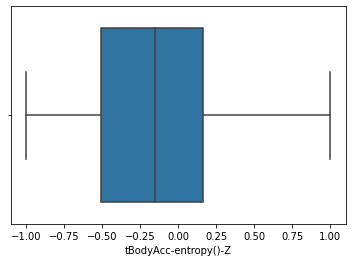

In [9]:
#box plot for 'tBodyAcc-entropy()-Z' column
sns.boxplot(train["tBodyAcc-entropy()-Z"])

<AxesSubplot:xlabel='tBodyAccJerk-entropy()-Z'>

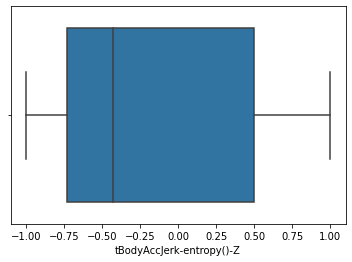

In [10]:
#box plot for 'tBodyAccJerk-entropy()-Z' column
sns.boxplot(train["tBodyAccJerk-entropy()-Z"])

<AxesSubplot:xlabel='tBodyAccJerk-mean()-Z'>

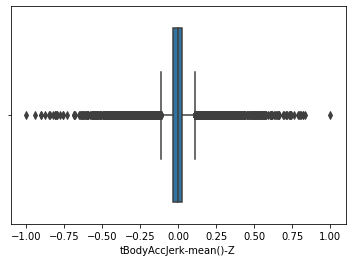

In [11]:
#box plot for 'tBodyAccJerk-mean()-Z' column
sns.boxplot(train["tBodyAccJerk-mean()-Z"])

#### Checking for categorical data:

In [12]:
train.select_dtypes(include=['object']).columns

Index(['Activity'], dtype='object')

## Details of FEATURES in the data:
<strong>These signals were used to estimate variables of the feature vector for each pattern:<br>
'-XYZ' is used to denote 3-axial signals in the X, Y and Z directions.<br>
<br>
tBodyAcc-XYZ<br>
tGravityAcc-XYZ<br>
tBodyAccJerk-XYZ<br>
tBodyGyro-XYZ<br>
tBodyGyroJerk-XYZ<br>
tBodyAccMag<br>
tGravityAccMag<br>
tBodyAccJerkMag<br>
tBodyGyroMag<br>
tBodyGyroJerkMag<br>
fBodyAcc-XYZ<br>
fBodyAccJerk-XYZ<br>
fBodyGyro-XYZ<br>
fBodyAccMag<br>
fBodyAccJerkMag<br>
fBodyGyroMag<br>
fBodyGyroJerkMag<br></strong>

# Feature Engineering:
<strong>The set of variables that were estimated from these signals are: <br>
<br>
mean(): Mean value<br>
std(): Standard deviation<br>
mad(): Median absolute deviation<br> 
max(): Largest value in array<br>
min(): Smallest value in array<br>
sma(): Signal magnitude area<br>
energy(): Energy measure. Sum of the squares divided by the number of values. <br>
iqr(): Interquartile range <br>
entropy(): Signal entropy<br>
arCoeff(): Autorregresion coefficients with Burg order equal to 4<br>
correlation(): correlation coefficient between two signals<br>
maxInds(): index of the frequency component with largest magnitude<br>
meanFreq(): Weighted average of the frequency components to obtain a mean frequency<br>
skewness(): skewness of the frequency domain signal <br>
kurtosis(): kurtosis of the frequency domain signal <br>
bandsEnergy(): Energy of a frequency interval within the 64 bins of the FFT of each window.<br>
angle(): Angle between to vectors.<br>
<br>
Additional vectors obtained by averaging the signals in a signal window sample. These are used on the angle() variable:<br>
<br>
gravityMean<br>
tBodyAccMean<br>
tBodyAccJerkMean<br>
tBodyGyroMean<br>
tBodyGyroJerkMean<br>
<br>
OUTPUT COLUMN-->
Here the output column is the ACTIVITY column.
</strong>

# Data Visualizations:

#### Visualizing the class imbalance in the Output Columns
This helps us to present how accurately the classification can be done, as , any high imblances in the data might lead to mispredictions

In [13]:
train.Activity.unique()
#we can see there are only 6 classes we need to classify the data into

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

<AxesSubplot:xlabel='Activity', ylabel='count'>

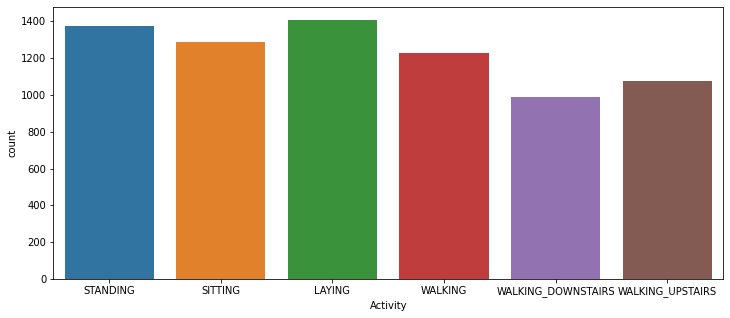

In [14]:
plt.subplots(figsize=(12,5)) #setting the figure size
sns.countplot(train.Activity) #plotting the count plot

##### The above plot also lets us know that the major activities among all are LAYING and STANDING (which is natural with regard to humans), and the low frequent activities are WALKING-Up/Downstairs.

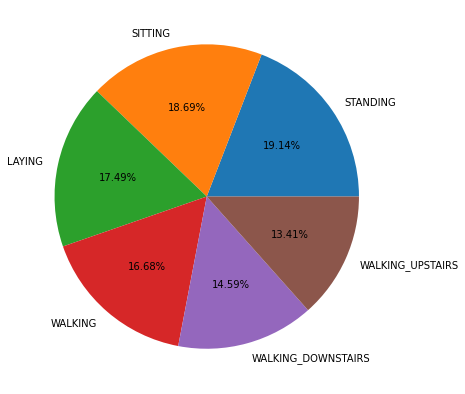

In [15]:
plt.subplots(figsize=(7,7)) #setting the figure size
plt.pie(train.Activity.value_counts(),labels=train.Activity.unique(),autopct='%1.2f%%') #plotting the pie
plt.show()
#we can see that all the features are equally distributed

### Splitting the data into INPUT and OUTPUT DataFrames:
x_train--> train INPUT; y_train --> train OUTPUT <br>
x_test--> test Input; y_test--> test INPUT<br>
###### the subject column in all the data is not useful for our model so we're gonna 'drop' that column
##### Here we're going to split the 'train' DataFrame into x_train,y_train,x_test,y_test and feed them to the models and then, we will be passing the 'test' DataFrame as raw data to obtain predictions from the model

In [16]:
#dropping the 'subject' column in train and test sets
train.drop(['subject'],axis=1,inplace=True)
test.drop(['subject'],axis=1,inplace=True)

## Train-Test-Split

In [17]:
x=train.drop(['Activity'],axis=1)
y=train.Activity
from sklearn.model_selection import train_test_split #importing the train-test-split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

##### Now, before we start build our models, we consider the data from all the columns as input to our models as it can be observed from the FEATURE Engineering process that , there are numerous columns but on the ground level, all the columns are just an engineered product of the ACCELEROMETER and GYROSCOPE inputs recorded in a continuous 'time-series'.
##### There's more than one reason to include all the Features as input to this data, one of it being, the 'JERK' values, actions like the ones we're classifying in here, they all generate JERKS while the actions are being performed. Therefore, this value is important and cannot be ignored from being passed as an input inspite of being highly correlated to the other values.
##### So, here I'm trying to consider every column of the data to predict my classes.

<AxesSubplot:>

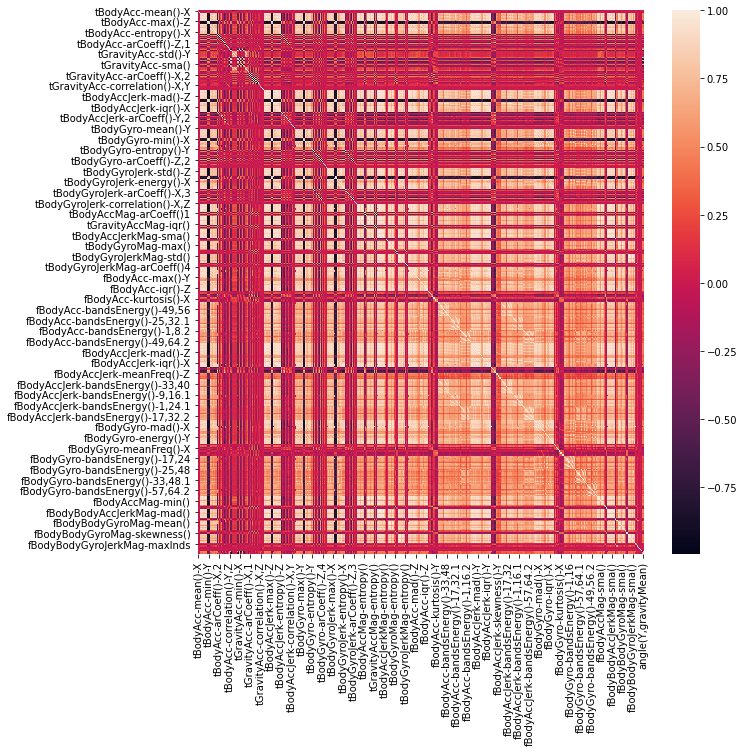

In [18]:
plt.subplots(figsize=(10,10))
sns.heatmap(x_train.corr())

### MODELING, TRAINING & TESTING:

### Logistic Regression:

In [19]:
from sklearn.linear_model import LogisticRegression #importing the model
lr=LogisticRegression() #creating object for the model
lr.fit(x_train,y_train) #fitting the model
lr_train_predict=lr.predict(x_train) #predicting the model on train data
lr_test_predict=lr.predict(x_test) #predicting the model on test data

/home/lancelot/anaconda3/envs/ML/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
##checking the metrics:
train_accu_score=np.zeros(4) ##to store the training accuracies of all the models
test_accu_score=np.zeros(4) ##to store the testing accuracies of all models
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
train_accu_score[0]=accuracy_score(y_train,lr_train_predict)
test_accu_score[0]=accuracy_score(y_test,lr_test_predict)

In [21]:
print("Logistic Regression Train Accuracy: ",train_accu_score[0])
print("Logistic Regression Test Accuracy: ",test_accu_score[0])

Logistic Regression Train Accuracy:  0.9909879272232613
Logistic Regression Test Accuracy:  0.9864038069340585


Logistic Regression Train Confusion Matrix: 


<AxesSubplot:>

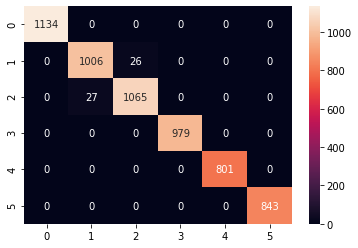

In [22]:
#confusion matrix for train data
print("Logistic Regression Train Confusion Matrix: ")
sns.heatmap(confusion_matrix(y_train,lr_train_predict),annot=True,fmt='1.0f')

Logistic Regression Test Confusion Matrix: 


<AxesSubplot:>

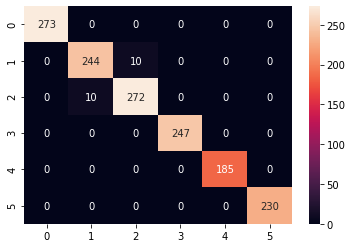

In [23]:
#confusion matrix for test data
print("Logistic Regression Test Confusion Matrix: ")
sns.heatmap(confusion_matrix(y_test,lr_test_predict),annot=True,fmt='1.0f')

In [24]:
#classification report for train data
print("Logistic Regression Train Classification Report: ")
print(classification_report(y_train,lr_train_predict))

Logistic Regression Train Classification Report: 
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00      1134
           SITTING       0.97      0.97      0.97      1032
          STANDING       0.98      0.98      0.98      1092
           WALKING       1.00      1.00      1.00       979
WALKING_DOWNSTAIRS       1.00      1.00      1.00       801
  WALKING_UPSTAIRS       1.00      1.00      1.00       843

          accuracy                           0.99      5881
         macro avg       0.99      0.99      0.99      5881
      weighted avg       0.99      0.99      0.99      5881



In [25]:
#classification report for test data
print("Logistic Regression Test Classification Report: ")
print(classification_report(y_test,lr_test_predict))

Logistic Regression Test Classification Report: 
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       273
           SITTING       0.96      0.96      0.96       254
          STANDING       0.96      0.96      0.96       282
           WALKING       1.00      1.00      1.00       247
WALKING_DOWNSTAIRS       1.00      1.00      1.00       185
  WALKING_UPSTAIRS       1.00      1.00      1.00       230

          accuracy                           0.99      1471
         macro avg       0.99      0.99      0.99      1471
      weighted avg       0.99      0.99      0.99      1471



### K-Nearest Neighbors Classifier:

In [26]:
from sklearn.neighbors import KNeighborsClassifier #importing the model
knc_init=KNeighborsClassifier(n_neighbors=20,metric='euclidean') #creating object for the model
knc_init.fit(x_train,y_train) #fitting the model
knc_init_train_predict=knc_init.predict(x_train) #predicting on train data
knc_init_test_predict=knc_init.predict(x_test) #predicting on test data

In [27]:
#checking the metrics
print("train: ",accuracy_score(y_train,knc_init_train_predict))
print("test: ",accuracy_score(y_test,knc_init_test_predict))

train:  0.9600408093861588
test:  0.9544527532290958


##### Calculating the optimal value for n_neighbors using ELBOW method:

In [28]:
score=[] #array to store the accuracies
for k in range(1,20):
    knn_model=KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(x_train,y_train)
    pred_test=knn_model.predict(x_test)
    score.append(accuracy_score(y_test,pred_test))
print(score) #printing the arrays

[0.9741672331747111, 0.9612508497620667, 0.973487423521414, 0.9707681849082257, 0.972807613868117, 0.9700883752549286, 0.9632902787219578, 0.964649898028552, 0.9639700883752549, 0.9632902787219578, 0.9680489462950373, 0.9653297076818491, 0.9660095173351462, 0.9626104690686608, 0.9605710401087696, 0.9598912304554724, 0.9564921821889871, 0.9571719918422842, 0.9530931339225017]


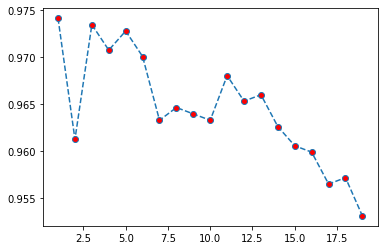

In [29]:
#plotting the score[Elbow Curve]
plt.plot(range(1,20),score,marker='o',markerfacecolor='r',linestyle='--')

Here it can be observed that the highest accuracy is achieved through the K-Nearest Neighbors Algorithm at the value where <strong>n_neighbors=1</strong>

In [30]:
#So, let's build a model with the same parameter value
knc=KNeighborsClassifier(n_neighbors=1,metric='euclidean') #building the model on the accquired value
knc.fit(x_train,y_train) #fitting the model
knc_train_predict=knc.predict(x_train) #predicting on train data
knc_test_predict=knc.predict(x_test) #predicting on test data
#checking the metrics
train_accu_score[1]=accuracy_score(y_train,knc_train_predict)
test_accu_score[1]=accuracy_score(y_test,knc_test_predict)
print("KNN Classifier Train Accuracy: ",train_accu_score[1])
print("KNN Classifier Test Accuracy: ",test_accu_score[1])

KNN Classifier Train Accuracy:  1.0
KNN Classifier Test Accuracy:  0.9741672331747111


K-Nearest Neighbors Train Confusion Matrix: 


<AxesSubplot:>

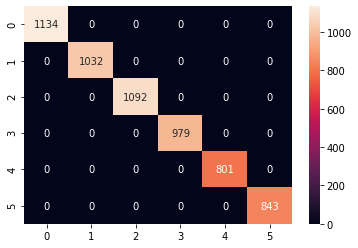

In [31]:
#confusion matrix for train data
print("K-Nearest Neighbors Train Confusion Matrix: ")
sns.heatmap(confusion_matrix(y_train,knc_train_predict),annot=True,fmt='1.0f')

K-Nearest Neighbors Test Confusion Matrix: 


<AxesSubplot:>

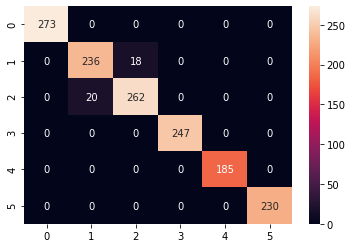

In [32]:
#confusion matrix for test data
print("K-Nearest Neighbors Test Confusion Matrix: ")
sns.heatmap(confusion_matrix(y_test,knc_test_predict),annot=True,fmt='1.0f')

In [33]:
#Classification report for train data
print("K-Nearest Neighbors Train Classification Report: ")
print(classification_report(y_train,knc_train_predict))

K-Nearest Neighbors Train Classification Report: 
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00      1134
           SITTING       1.00      1.00      1.00      1032
          STANDING       1.00      1.00      1.00      1092
           WALKING       1.00      1.00      1.00       979
WALKING_DOWNSTAIRS       1.00      1.00      1.00       801
  WALKING_UPSTAIRS       1.00      1.00      1.00       843

          accuracy                           1.00      5881
         macro avg       1.00      1.00      1.00      5881
      weighted avg       1.00      1.00      1.00      5881



In [34]:
#Classification report for test data
print("K-Nearest Neighbors Test Classification Report: ")
print(classification_report(y_test,knc_test_predict))

K-Nearest Neighbors Test Classification Report: 
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       273
           SITTING       0.92      0.93      0.93       254
          STANDING       0.94      0.93      0.93       282
           WALKING       1.00      1.00      1.00       247
WALKING_DOWNSTAIRS       1.00      1.00      1.00       185
  WALKING_UPSTAIRS       1.00      1.00      1.00       230

          accuracy                           0.97      1471
         macro avg       0.98      0.98      0.98      1471
      weighted avg       0.97      0.97      0.97      1471



### Naive Bayes:

In [35]:
from sklearn.naive_bayes import GaussianNB #importing the model
nb=GaussianNB() #creating an object for the model
nb.fit(x_train,y_train) #fitting the model
nb_train_predict=nb.predict(x_train) #predicting on train data
nb_test_predict=nb.predict(x_test) #predicting on test data
#checking the metrics
train_accu_score[2]=accuracy_score(y_train,nb_train_predict)
test_accu_score[2]=accuracy_score(y_test,nb_test_predict)
print("Naive Bayes Classifier Train Accuracy: ",train_accu_score[2])
print("Naive Bayes Test Accuracy: ",test_accu_score[2])

Naive Bayes Classifier Train Accuracy:  0.730998129569801
Naive Bayes Test Accuracy:  0.7307953772943576


Naive Bayes Train Confusion Matrix: 


<AxesSubplot:>

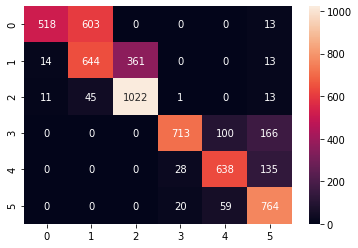

In [36]:
#confusion matrix for train data
print("Naive Bayes Train Confusion Matrix: ")
sns.heatmap(confusion_matrix(y_train,nb_train_predict),annot=True,fmt='1.0f')

Naive Bayes Test Confusion Matrix: 


<AxesSubplot:>

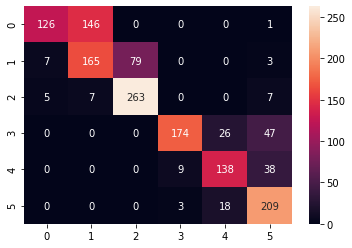

In [37]:
#confusion matrix for test data
print("Naive Bayes Test Confusion Matrix: ")
sns.heatmap(confusion_matrix(y_test,nb_test_predict),annot=True,fmt='1.0f')

In [38]:
#classification report for train data
print("Naive Bayes Train Classification Report: ")
print(classification_report(y_train,nb_train_predict))

Naive Bayes Train Classification Report: 
                    precision    recall  f1-score   support

            LAYING       0.95      0.46      0.62      1134
           SITTING       0.50      0.62      0.55      1032
          STANDING       0.74      0.94      0.83      1092
           WALKING       0.94      0.73      0.82       979
WALKING_DOWNSTAIRS       0.80      0.80      0.80       801
  WALKING_UPSTAIRS       0.69      0.91      0.78       843

          accuracy                           0.73      5881
         macro avg       0.77      0.74      0.73      5881
      weighted avg       0.77      0.73      0.73      5881



In [39]:
#classification report for test data
print("Naive Bayes Test Classification Report: ")
print(classification_report(y_test,nb_test_predict))

Naive Bayes Test Classification Report: 
                    precision    recall  f1-score   support

            LAYING       0.91      0.46      0.61       273
           SITTING       0.52      0.65      0.58       254
          STANDING       0.77      0.93      0.84       282
           WALKING       0.94      0.70      0.80       247
WALKING_DOWNSTAIRS       0.76      0.75      0.75       185
  WALKING_UPSTAIRS       0.69      0.91      0.78       230

          accuracy                           0.73      1471
         macro avg       0.76      0.73      0.73      1471
      weighted avg       0.77      0.73      0.73      1471



### Random Forest Classifier:

In [40]:
from sklearn.ensemble import RandomForestClassifier #Import the model
rfc=RandomForestClassifier(criterion='entropy') #creating an object for the model
rfc.fit(x_train,y_train) #fitting the model
rfc_train_predict=rfc.predict(x_train) #Predicting the model on train data
rfc_test_predict=rfc.predict(x_test) #predicting the model on test data
#checking the metrics
train_accu_score[3]=accuracy_score(y_train,rfc_train_predict)
test_accu_score[3]=accuracy_score(y_test,rfc_test_predict)
print("Random Forest Classifier Train Accuracy: ",train_accu_score[3])
print("Random Forest Classifier Test Accuracy: ",test_accu_score[3])

Random Forest Classifier Train Accuracy:  1.0
Random Forest Classifier Test Accuracy:  0.9789259007477906


Random Forest Classifier Train Confusion Matrix: 


<AxesSubplot:>

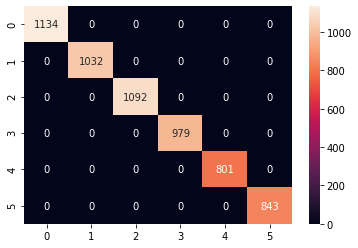

In [41]:
#confusion matrix for train data
print("Random Forest Classifier Train Confusion Matrix: ")
sns.heatmap(confusion_matrix(y_train,rfc_train_predict),annot=True,fmt='1.0f')

Random Forest Classifier Test Confusion Matrix: 


<AxesSubplot:>

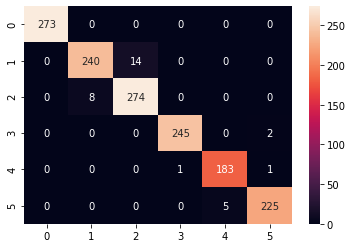

In [42]:
#confusion matrix for test data
print("Random Forest Classifier Test Confusion Matrix: ")
sns.heatmap(confusion_matrix(y_test,rfc_test_predict),annot=True,fmt='1.0f')

In [43]:
#classification report for train data
print("Random Forest Classifier Train Classification Report: ")
print(classification_report(y_train,rfc_train_predict))

Random Forest Classifier Train Classification Report: 
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00      1134
           SITTING       1.00      1.00      1.00      1032
          STANDING       1.00      1.00      1.00      1092
           WALKING       1.00      1.00      1.00       979
WALKING_DOWNSTAIRS       1.00      1.00      1.00       801
  WALKING_UPSTAIRS       1.00      1.00      1.00       843

          accuracy                           1.00      5881
         macro avg       1.00      1.00      1.00      5881
      weighted avg       1.00      1.00      1.00      5881



In [44]:
#classification report for test data
print("Random Forest Classifier Test Classification Report: ")
print(classification_report(y_test,rfc_test_predict))

Random Forest Classifier Test Classification Report: 
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       273
           SITTING       0.97      0.94      0.96       254
          STANDING       0.95      0.97      0.96       282
           WALKING       1.00      0.99      0.99       247
WALKING_DOWNSTAIRS       0.97      0.99      0.98       185
  WALKING_UPSTAIRS       0.99      0.98      0.98       230

          accuracy                           0.98      1471
         macro avg       0.98      0.98      0.98      1471
      weighted avg       0.98      0.98      0.98      1471



## Visualizing the Accuracies obtained from each model:

In [45]:
train_accu_score #train accuracy scores

array([0.99098793, 1.        , 0.73099813, 1.        ])

In [46]:
test_accu_score #test Accuracy scores

array([0.98640381, 0.97416723, 0.73079538, 0.9789259 ])

Text(0.5, 1.0, 'Test Accuracy of various algorithms')

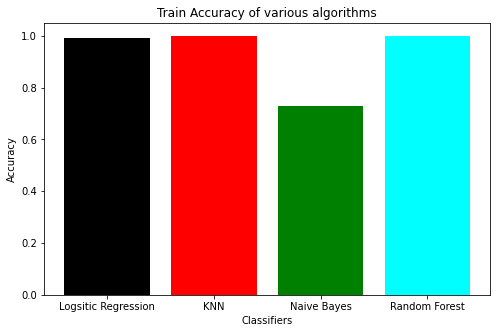

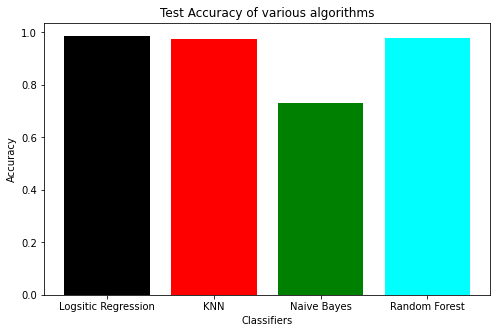

In [47]:
#Plotting For train accuracies
plt.subplots(figsize=(8,5))
labels = ['Logsitic Regression', 'KNN','Naive Bayes','Random Forest']
plt.bar(labels,train_accu_score,color=['black', 'red', 'green', 'cyan'])
plt.xlabel('Classifiers') #assigning X label
plt.ylabel('Accuracy') #assigning Y label
plt.title('Train Accuracy of various algorithms') #assigning Title


plt.subplots(figsize=(8,5))
labels = ['Logsitic Regression', 'KNN','Naive Bayes','Random Forest']
plt.bar(labels,test_accu_score,color=['black', 'red', 'green','cyan'])
plt.xlabel('Classifiers') #assigning X label
plt.ylabel('Accuracy') #assigning Y label
plt.title('Test Accuracy of various algorithms') #assigning Title

#### Train Accuracy:
- The train accuracy is maximum for the Logistic regression and KNN models

#### Test Accuracy:
- The test accuracy barplot shows us that maxium accuracy is achieved through LOGISTIC REGRESSION model

###### Therefore, we can hereby conclude that through LOGISTIC REGRESSION models(test accuracy= 95%) we can most accurately predict an activity being done through the inputs from the ACCELEROMETER and the GYROSCOPE sensors in a Smart Phone.

### Now, lets try to use the best model,i.e, Logistic Regression model and classify the data on an unseen DataFrame ,i.e, the Test DataFrame
#### But first, we need to split the 'test' DataFrame into 'input' and 'output'

In [48]:
#splitting the test DataFrame into input and output
inp=test.drop(['Activity'],axis=1)
out=test.Activity

In [49]:
#using the pre-trained Logistic Regression model to classify out input from 'test' DataFrame
pred=lr.predict(inp)
print("Accuracy of Logistic regression on Unseen data: ",accuracy_score(out,pred))

Accuracy of Logistic regression on Unseen data:  0.9558873430607397
